In [9]:
from sklearn import datasets,preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
data_train = np.loadtxt("ccpp_train.csv",delimiter=",")
data_test = np.loadtxt("ccpp_test.csv",delimiter=",")

In [11]:
x_train = pd.DataFrame(data_train[:,:-1])
y_train = data_train[:,-1]
x_test =pd.DataFrame(data_test.copy())
x_train.shape,x_test.shape

((7176, 4), (2392, 4))

In [12]:
df=pd.DataFrame(x_train)
df1=pd.DataFrame(x_test)

df.columns = ['t','p','r','v']
df1.columns = ['t','p','r','v']

for i in df.columns:
    name = i+"_"+i
    df[name] = df[i]**2
    df1[name] = df1[i]**2

x2_train = df.values
x2_test = df1.values
x2_train.shape,x2_test.shape

((7176, 8), (2392, 8))

In [13]:
df.describe()

,t,p,r,v,t_t,p_p,r_r,v_v
count,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000,7.176000e+03,7176.000000
mean,19.629712,54.288154,1013.263032,73.275818,441.197241,3109.780886,1.026738e+06,5583.209039
std,7.475256,12.751468,5.964863,14.625093,291.386373,1422.362595,1.209811e+04,2069.245715
min,1.810000,25.360000,992.890000,25.560000,3.276100,643.129600,9.858306e+05,653.313600
25%,13.470000,41.740000,1009.010000,63.202500,181.440900,1742.227600,1.018101e+06,3994.556175
50%,20.315000,52.050000,1012.910000,74.895000,412.699250,2709.202500,1.025987e+06,5609.261050
75%,25.720000,66.540000,1017.302500,84.925000,661.518400,4427.571600,1.034904e+06,7212.255700
max,35.770000,81.560000,1033.300000,100.160000,1279.492900,6652.033600,1.067709e+06,10032.025600


In [14]:
scaler = preprocessing.StandardScaler()

In [15]:
scaler.fit(x2_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [16]:
x2_train=scaler.transform(x2_train)
x2_test=scaler.transform(x2_test)

In [17]:
P = np.ones((len(x2_train), len(x2_train[0]) + 1))
print(P.shape)
P[:,:-1] = x2_train
x3_train = P
print(P.shape)
P = np.ones((len(x2_test), len(x2_test[0]) + 1))
P[:,:-1] = x2_test
x3_test = P

(7176, 9)
(7176, 9)


In [18]:
def step_gradient(x,y,alpha,m):
    m_slope = np.zeros(len(m))
    M = len(x)
    N = len(x[0])
    
    # we use stochastic gradient descent here 
    for i in range(M):
        for j in range(N):
            m_slope[j] += (-2/M)*(y[i]-(m*x[i]).sum())*x[i][j]
    m = m - alpha*m_slope
    return m

In [19]:
def cost(x,y,m):
    cost = 0
    M = len(x)
    
    for i in range(M):
        cost += (1/M)*((y[i]-(m*x[i]).sum())**2)
    return cost

In [20]:
def gradient_descent(x,y,alpha,n):
    M = len(x)
    N = len(x[0])
    m = np.zeros(N)
    costs = []
    itr = []
    for i in range(n):
        m = step_gradient(x,y,alpha,m)
        cos = cost(x,y,m)
        costs.append(cos)
        itr.append(i)
        print(i,"Cost: ",cos)
    return m,costs,itr

In [21]:
def predict(x,m):
    M = len(x)
    y_pred = np.zeros(M)
    
    for i in range(M):
        y_pred[i] = (m*x[i]).sum()
        
    return y_pred

In [22]:
learning_rate = 0.1
no_of_iteration = 1000
m, costs, itr = gradient_descent(x3_train,y_train,learning_rate,no_of_iteration)
print(m)

0 Cost:  132210.39964612355
1 Cost:  84626.35732344491
2 Cost:  54172.64927958865
3 Cost:  34682.17114639696
4 Cost:  22208.124904034776
5 Cost:  14224.584203616925
6 Cost:  9114.967018832624
7 Cost:  5844.665679381728
8 Cost:  3751.533342848066
9 Cost:  2411.796789631685
10 Cost:  1554.2412837659897
11 Cost:  1005.289206832916
12 Cost:  653.8505450318531
13 Cost:  428.8272843535948
14 Cost:  284.7162677635774
15 Cost:  192.39504755884096
16 Cost:  133.22484351669075
17 Cost:  95.27644255979084
18 Cost:  70.9147774872291
19 Cost:  55.25305831190367
20 Cost:  45.16341613714674
21 Cost:  38.64371443572276
22 Cost:  34.412307141370675
23 Cost:  31.6486825508611
24 Cost:  29.82747409800959
25 Cost:  28.6122259381772
26 Cost:  27.787401656974044
27 Cost:  27.214868641308257
28 Cost:  26.806046945177556
29 Cost:  26.504083505402168
30 Cost:  26.272442653867408
31 Cost:  26.087603129535307
32 Cost:  25.934383316817478
33 Cost:  25.802948611402016
34 Cost:  25.68689540617299
35 Cost:  25.58202

281 Cost:  19.90170647842149
282 Cost:  19.894216056865744
283 Cost:  19.88677888443591
284 Cost:  19.879394579205687
285 Cost:  19.87206276199732
286 Cost:  19.864783056361293
287 Cost:  19.857555088556783
288 Cost:  19.850378487531835
289 Cost:  19.843252884905237
290 Cost:  19.836177914945363
291 Cost:  19.82915321455249
292 Cost:  19.822178423239677
293 Cost:  19.815253183113235
294 Cost:  19.808377138854894
295 Cost:  19.801549937702536
296 Cost:  19.794771229432236
297 Cost:  19.788040666339985
298 Cost:  19.781357903223054
299 Cost:  19.77472259736255
300 Cost:  19.768134408505365
301 Cost:  19.761592998845913
302 Cost:  19.755098033009375
303 Cost:  19.74864917803345
304 Cost:  19.742246103351498
305 Cost:  19.735888480774516
306 Cost:  19.729575984475197
307 Cost:  19.72330829096979
308 Cost:  19.71708507910187
309 Cost:  19.710906030025175
310 Cost:  19.704770827187417
311 Cost:  19.698679156313446
312 Cost:  19.692630705388876
313 Cost:  19.686625164643637
314 Cost:  19.6806

559 Cost:  18.98901103112223
560 Cost:  18.987951501653928
561 Cost:  18.98689924439914
562 Cost:  18.98585420786509
563 Cost:  18.98481634092765
564 Cost:  18.98378559282894
565 Cost:  18.982761913174105
566 Cost:  18.98174525192946
567 Cost:  18.9807355594199
568 Cost:  18.97973278632539
569 Cost:  18.97873688367943
570 Cost:  18.977747802866016
571 Cost:  18.976765495617162
572 Cost:  18.97578991401037
573 Cost:  18.974821010466496
574 Cost:  18.973858737746845
575 Cost:  18.972903048950677
576 Cost:  18.971953897513693
577 Cost:  18.971011237203932
578 Cost:  18.970075022121158
579 Cost:  18.969145206693213
580 Cost:  18.968221745674256
581 Cost:  18.96730459414257
582 Cost:  18.966393707497495
583 Cost:  18.96548904145772
584 Cost:  18.964590552059157
585 Cost:  18.963698195651684
586 Cost:  18.962811928898198
587 Cost:  18.961931708771328
588 Cost:  18.961057492551852
589 Cost:  18.96018923782587
590 Cost:  18.9593269024832
591 Cost:  18.958470444715086
592 Cost:  18.957619823011

837 Cost:  18.855475485229647
838 Cost:  18.855305475184586
839 Cost:  18.855136508950952
840 Cost:  18.854968579453406
841 Cost:  18.854801679666064
842 Cost:  18.854635802612716
843 Cost:  18.85447094136658
844 Cost:  18.854307089049094
845 Cost:  18.85414423883065
846 Cost:  18.853982383929207
847 Cost:  18.85382151761082
848 Cost:  18.853661633188757
849 Cost:  18.853502724023542
850 Cost:  18.853344783522182
851 Cost:  18.85318780513835
852 Cost:  18.85303178237125
853 Cost:  18.852876708766416
854 Cost:  18.852722577914584
855 Cost:  18.85256938345115
856 Cost:  18.852417119056938
857 Cost:  18.852265778456783
858 Cost:  18.852115355419603
859 Cost:  18.85196584375822
860 Cost:  18.851817237329193
861 Cost:  18.8516695300318
862 Cost:  18.851522715808432
863 Cost:  18.851376788644092
864 Cost:  18.851231742565865
865 Cost:  18.851087571643095
866 Cost:  18.850944269986428
867 Cost:  18.85080183174786
868 Cost:  18.85066025112072
869 Cost:  18.850519522339106
870 Cost:  18.8503796

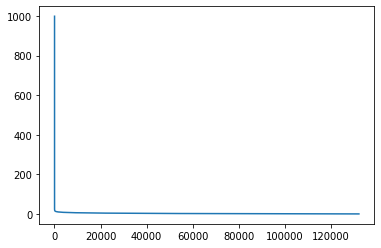

In [23]:
plt.plot(costs,itr)
plt.show()

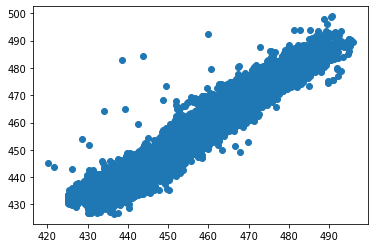

In [24]:
y_train_pred = predict(x3_train,m)
plt.scatter(y_train,y_train_pred)
plt.show()

In [25]:
y_test_pred = predict(x3_test,m)
np.savetxt("ccpp_pred.csv",y_test_pred)